In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import os
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms, datasets

# Defining directories
task1_train_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-1/Train"
task1_test_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-1/Test"
task1_val_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-1/Val"

task2_train_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-2/Train"
task2_test_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-2/Test"
task2_val_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-2/Val"

task3_train_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train"
task3_test_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Test"
task3_val_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Val"

task4_train_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-4/Train"
task4_test_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-4/Test"
task4_val_dir = "/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-4/Val"

In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir("/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts")

There are 4 directories and 0 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train'.
There are 0 directories and 1200 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train/eggplant__healthy'.
There are 0 directories and 1200 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train/eggplant__N'.
There are 0 directories and 1200 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Train/eggplant__N_K'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480by480__trts/Task-3/Val'.
There are 0 directories and 150 images in '/content/drive/MyDrive/Data/Untitled folder/new_same_480b

# Transform

In [ ]:
import torchvision

In [ ]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # "DEFAULT" = best available weights
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
# Get the transforms used to create our pretrained weights
transform = weights.transforms()
transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
# Loading datasets using ImageFolder
task1_train_dataset = datasets.ImageFolder(root=task1_train_dir, transform=transform)
task1_test_dataset = datasets.ImageFolder(root=task1_test_dir, transform=transform)
task1_val_dataset = datasets.ImageFolder(root=task1_val_dir, transform=transform)

task2_train_dataset = datasets.ImageFolder(root=task2_train_dir, transform=transform)
task2_test_dataset = datasets.ImageFolder(root=task2_test_dir, transform=transform)
task2_val_dataset = datasets.ImageFolder(root=task2_val_dir, transform=transform)

task3_train_dataset = datasets.ImageFolder(root=task3_train_dir, transform=transform)
task3_test_dataset = datasets.ImageFolder(root=task3_test_dir, transform=transform)
task3_val_dataset = datasets.ImageFolder(root=task3_val_dir, transform=transform)

task4_train_dataset = datasets.ImageFolder(root=task4_train_dir, transform=transform)
task4_test_dataset = datasets.ImageFolder(root=task4_test_dir, transform=transform)
task4_val_dataset = datasets.ImageFolder(root=task4_val_dir, transform=transform)

In [ ]:
task1_class_names = task1_train_dataset.classes
task1_class_names

['ash_gourd__N', 'ash_gourd__N_K', 'ash_gourd__healthy']

In [ ]:
task2_class_names = task2_train_dataset.classes
task2_class_names

['bitter_gourd__N', 'bitter_gourd__N_K', 'bitter_gourd__healthy']

In [ ]:
task3_class_names = task3_train_dataset.classes
task3_class_names

['eggplant__N', 'eggplant__N_K', 'eggplant__healthy']

In [ ]:
task4_class_names = task4_train_dataset.classes
task4_class_names

['snake_gourd__N', 'snake_gourd__N_K', 'snake_gourd__healthy']

In [ ]:
# Creating DataLoaders
batch_size = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {batch_size} and {NUM_WORKERS} workers.")

task1_train_loader = torch.utils.data.DataLoader(task1_train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
task1_test_loader = torch.utils.data.DataLoader(task1_test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)
task1_val_loader = torch.utils.data.DataLoader(task1_val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

task2_train_loader = torch.utils.data.DataLoader(task2_train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
task2_test_loader = torch.utils.data.DataLoader(task2_test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)
task2_val_loader = torch.utils.data.DataLoader(task2_val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

task3_train_loader = torch.utils.data.DataLoader(task3_train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
task3_test_loader = torch.utils.data.DataLoader(task3_test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)
task3_val_loader = torch.utils.data.DataLoader(task3_val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

task4_train_loader = torch.utils.data.DataLoader(task4_train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
task4_test_loader = torch.utils.data.DataLoader(task4_test_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)
task4_val_loader = torch.utils.data.DataLoader(task4_val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

Creating DataLoader's with batch size 32 and 12 workers.


# Model

In [ ]:
import torchvision.models as models

In [ ]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 195MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [ ]:
# Print with torchinfo
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary

summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

In [ ]:
# # Freeze all of the base layers in EffNetB0
# for param in model.features.parameters():
#   # print(param)
#   param.requires_grad = False

In [ ]:
# Update the classifier head of our model to suit our problem
from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, # feature vector coming in
              out_features=len(task1_class_names))).to(device) # how many classes do we have?

model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [ ]:
# Print with torchinfo
from torchinfo import summary

summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

# Training on Task-1

In [ ]:
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          early_stopping_patience: int = 5,
          save_path: str = 'best_model.pth') -> Dict[str, List]:
    """Trains and tests a PyTorch model with early stopping and model saving.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").
    early_stopping_patience: An integer indicating the number of epochs to wait
                             for an improvement in the test loss before stopping
                             the training early.
    save_path: A string indicating the path to save the best model.

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics.
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Initialize variables for early stopping and model saving
    best_loss = float('inf')
    patience_counter = 0

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"val_loss: {test_loss:.4f} | "
          f"val_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        # Check if test loss has improved
        if test_loss < best_loss:
            best_loss = test_loss
            patience_counter = 0  # reset patience counter

            # Save the best model
            torch.save(model.state_dict(), save_path)
            print(f"Best model saved at epoch {epoch+1} with val loss {test_loss:.4f}")

        else:
            patience_counter += 1

        # Early stopping condition
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

    # Return the filled results at the end of the epochs
    return results

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model/best_model_task1.pth'

In [ ]:
print("Training on Task-1")
print()
print()

# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Setup training and save the results
results = train(model=model,
                       train_dataloader=task1_train_loader,
                       test_dataloader=task1_val_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=100,
                       device=device,
                       early_stopping_patience=10,
                       save_path=save_path)

# End the timer and print out how long it took
end_time = timer()
print()
print()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Training on Task-1




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4598 | train_acc: 0.8272 | val_loss: 0.2378 | val_acc: 0.9104
Best model saved at epoch 1 with val loss 0.2378
Epoch: 2 | train_loss: 0.2066 | train_acc: 0.9262 | val_loss: 0.1617 | val_acc: 0.9396
Best model saved at epoch 2 with val loss 0.1617
Epoch: 3 | train_loss: 0.1355 | train_acc: 0.9524 | val_loss: 0.1325 | val_acc: 0.9583
Best model saved at epoch 3 with val loss 0.1325
Epoch: 4 | train_loss: 0.0788 | train_acc: 0.9732 | val_loss: 0.1301 | val_acc: 0.9563
Best model saved at epoch 4 with val loss 0.1301
Epoch: 5 | train_loss: 0.0883 | train_acc: 0.9704 | val_loss: 0.1079 | val_acc: 0.9583
Best model saved at epoch 5 with val loss 0.1079
Epoch: 6 | train_loss: 0.0643 | train_acc: 0.9790 | val_loss: 0.1169 | val_acc: 0.9500
Epoch: 7 | train_loss: 0.0421 | train_acc: 0.9870 | val_loss: 0.0621 | val_acc: 0.9792
Best model saved at epoch 7 with val loss 0.0621
Epoch: 8 | train_loss: 0.0577 | train_acc: 0.9817 | val_loss: 0.3918 | val_acc: 0.9167
Epoch: 9 |

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "Val_loss": [...],
             "val_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

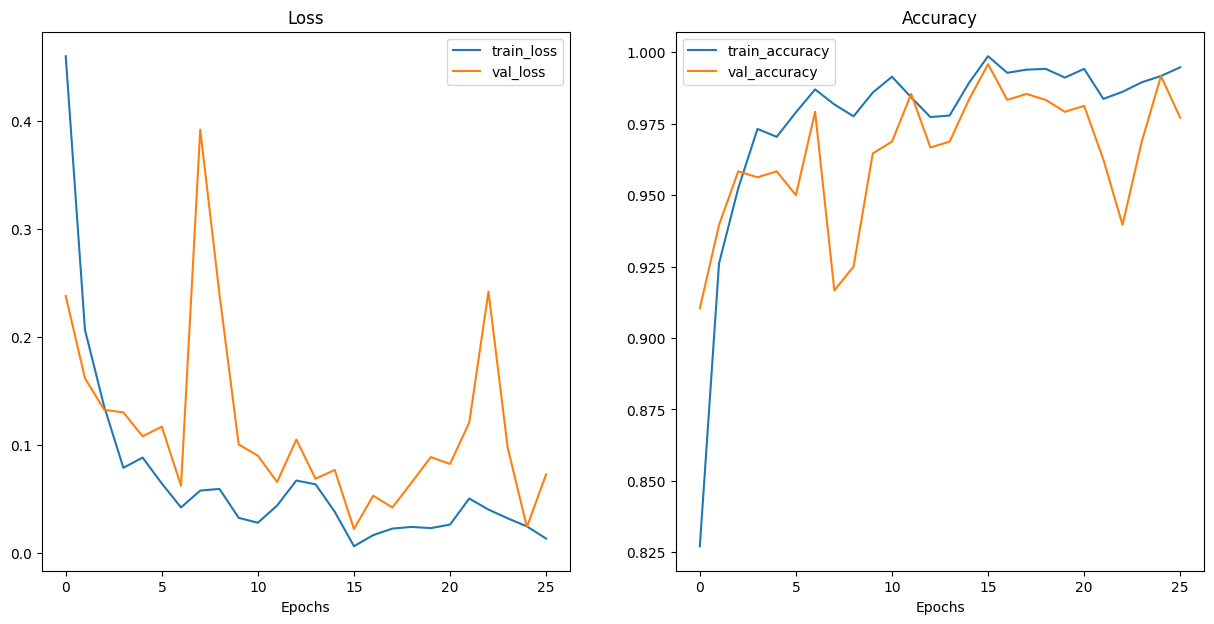

In [ ]:
plot_loss_curves(results)

# Test on Task-1,2,3 while trained on Task-1

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import numpy as np

def test(model: torch.nn.Module,
         dataloader: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module,
         device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch and displays the confusion matrix.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Lists to store true and predicted labels
    all_preds = []
    all_labels = []

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

            # Store predictions and labels for confusion matrix
            all_preds.append(test_pred_labels.cpu().numpy())
            all_labels.append(y.cpu().numpy())

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    # Concatenate all predictions and labels
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print(f"Test loss {test_loss}")
    print(f"Test accuracy {test_acc}")

    return test_loss, test_acc

    # return test_loss, test_acc


In [ ]:
# model.load_state_dict(save_path)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

Trained on Task-1

Testing on the first task:



<ipython-input-30-993df5cccc9c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


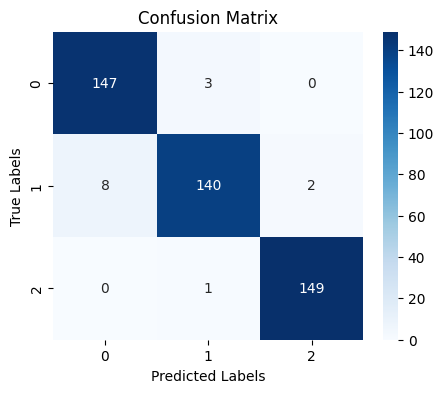

Test loss 0.08959562311598954
Test accuracy 0.9708333333333333


In [ ]:
# Load the saved best model
model.load_state_dict(torch.load(save_path))

# Put the model on the correct device
model.to(device)

print("Trained on Task-1")
print()

print("Testing on the first task:")
print()

t1_loss_on_task1, t1_acc_on_task1 = test(model=model,
    dataloader=task1_test_loader,
    loss_fn=loss_fn,
    device=device)

# Training on Task-2

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model/best_model_task2.pth'

In [ ]:
print("Training on Task-2")
print()
print()

# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(model=model,
                       train_dataloader=task2_train_loader,
                       test_dataloader=task2_val_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=100,
                       device=device,
                       early_stopping_patience=10,
                       save_path=save_path)

# End the timer and print out how long it took
end_time = timer()
print()
print()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Training on Task-2




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6590 | train_acc: 0.7497 | val_loss: 0.4068 | val_acc: 0.8479
Best model saved at epoch 1 with val loss 0.4068
Epoch: 2 | train_loss: 0.3058 | train_acc: 0.8861 | val_loss: 0.2639 | val_acc: 0.8958
Best model saved at epoch 2 with val loss 0.2639
Epoch: 3 | train_loss: 0.1743 | train_acc: 0.9375 | val_loss: 0.3108 | val_acc: 0.9021
Epoch: 4 | train_loss: 0.0892 | train_acc: 0.9701 | val_loss: 0.2160 | val_acc: 0.9187
Best model saved at epoch 4 with val loss 0.2160
Epoch: 5 | train_loss: 0.0898 | train_acc: 0.9679 | val_loss: 0.3969 | val_acc: 0.8875
Epoch: 6 | train_loss: 0.0728 | train_acc: 0.9751 | val_loss: 0.2232 | val_acc: 0.9250
Epoch: 7 | train_loss: 0.0781 | train_acc: 0.9737 | val_loss: 0.2402 | val_acc: 0.9271
Epoch: 8 | train_loss: 0.0553 | train_acc: 0.9826 | val_loss: 0.2550 | val_acc: 0.9104
Epoch: 9 | train_loss: 0.0397 | train_acc: 0.9845 | val_loss: 0.7165 | val_acc: 0.8458
Epoch: 10 | train_loss: 0.0418 | train_acc: 0.9834 | val_loss: 0.2707 

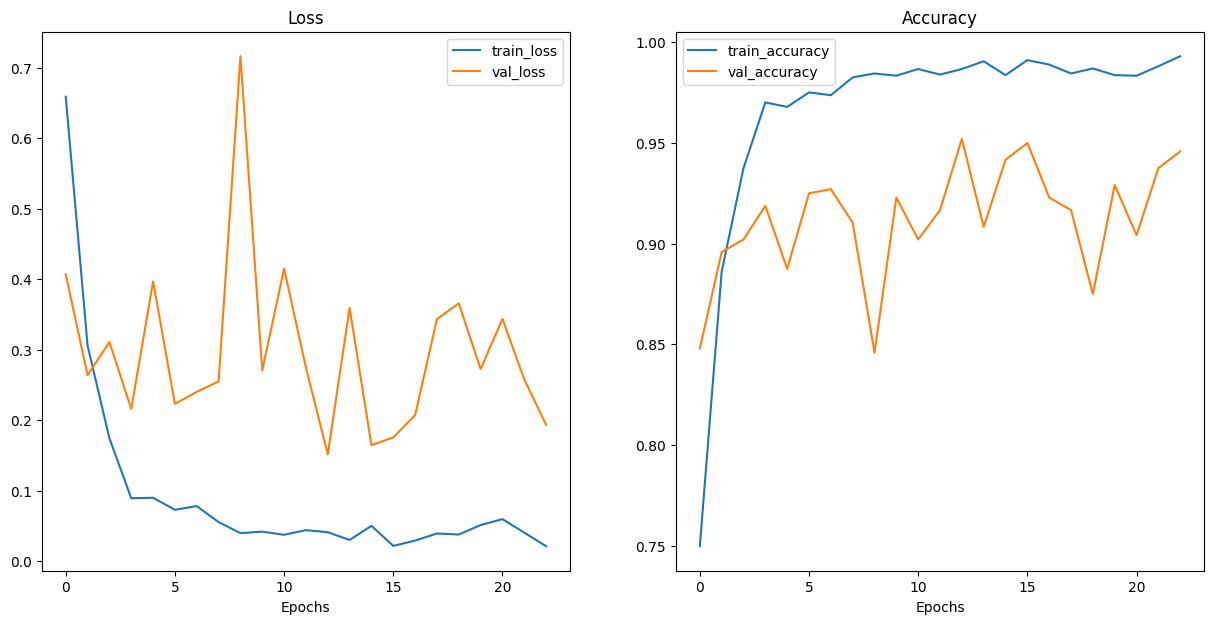

In [ ]:
plot_loss_curves(results)

# Test on Task-1,2,3 while trained on Task-2

Trained on Task-2

Testing on the first task:



<ipython-input-34-96a2409627cf>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


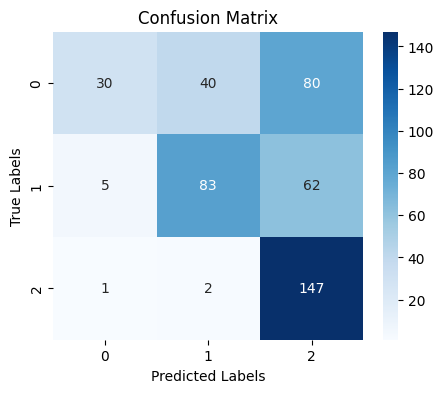

Test loss 2.8433017458145136
Test accuracy 0.6041666666666666
Testing on the second task:



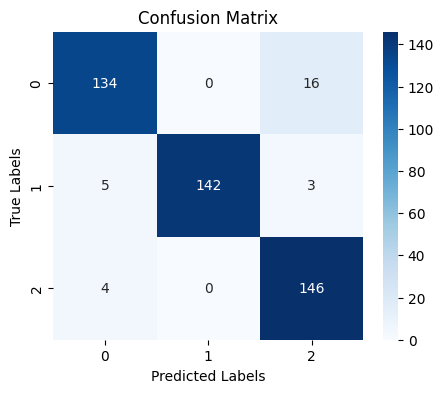

Test loss 0.17802650931395572
Test accuracy 0.9416666666666667


In [ ]:
# Load the saved best model
model.load_state_dict(torch.load(save_path))

# Put the model on the correct device
model.to(device)

print("Trained on Task-2")
print()

print("Testing on the first task:")
print()

t1_loss_on_task2, t1_acc_on_task2 = test(model=model,
    dataloader=task1_test_loader,
    loss_fn=loss_fn,
    device=device)

print("Testing on the second task:")
print()

t2_loss_on_task2, t2_acc_on_task2 = test(model=model,
    dataloader=task2_test_loader,
    loss_fn=loss_fn,
    device=device)

# Training on Task-3

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model/best_model_task3.pth'

In [ ]:
print("Training on Task-3")
print()
print()

# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(model=model,
                       train_dataloader=task3_train_loader,
                       test_dataloader=task3_val_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=100,
                       device=device,
                       early_stopping_patience=10,
                       save_path=save_path)

# End the timer and print out how long it took
end_time = timer()
print()
print()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Training on Task-3




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6188 | train_acc: 0.7718 | val_loss: 0.2524 | val_acc: 0.9062
Best model saved at epoch 1 with val loss 0.2524
Epoch: 2 | train_loss: 0.2196 | train_acc: 0.9217 | val_loss: 0.1195 | val_acc: 0.9604
Best model saved at epoch 2 with val loss 0.1195
Epoch: 3 | train_loss: 0.1071 | train_acc: 0.9613 | val_loss: 0.1245 | val_acc: 0.9521
Epoch: 4 | train_loss: 0.0697 | train_acc: 0.9782 | val_loss: 0.0741 | val_acc: 0.9750
Best model saved at epoch 4 with val loss 0.0741
Epoch: 5 | train_loss: 0.0228 | train_acc: 0.9917 | val_loss: 0.1748 | val_acc: 0.9542
Epoch: 6 | train_loss: 0.0366 | train_acc: 0.9864 | val_loss: 0.1559 | val_acc: 0.9583
Epoch: 7 | train_loss: 0.0321 | train_acc: 0.9892 | val_loss: 0.1652 | val_acc: 0.9583
Epoch: 8 | train_loss: 0.0455 | train_acc: 0.9848 | val_loss: 0.1169 | val_acc: 0.9583
Epoch: 9 | train_loss: 0.0268 | train_acc: 0.9900 | val_loss: 0.1278 | val_acc: 0.9563
Epoch: 10 | train_loss: 0.0498 | train_acc: 0.9845 | val_loss: 0.1262 

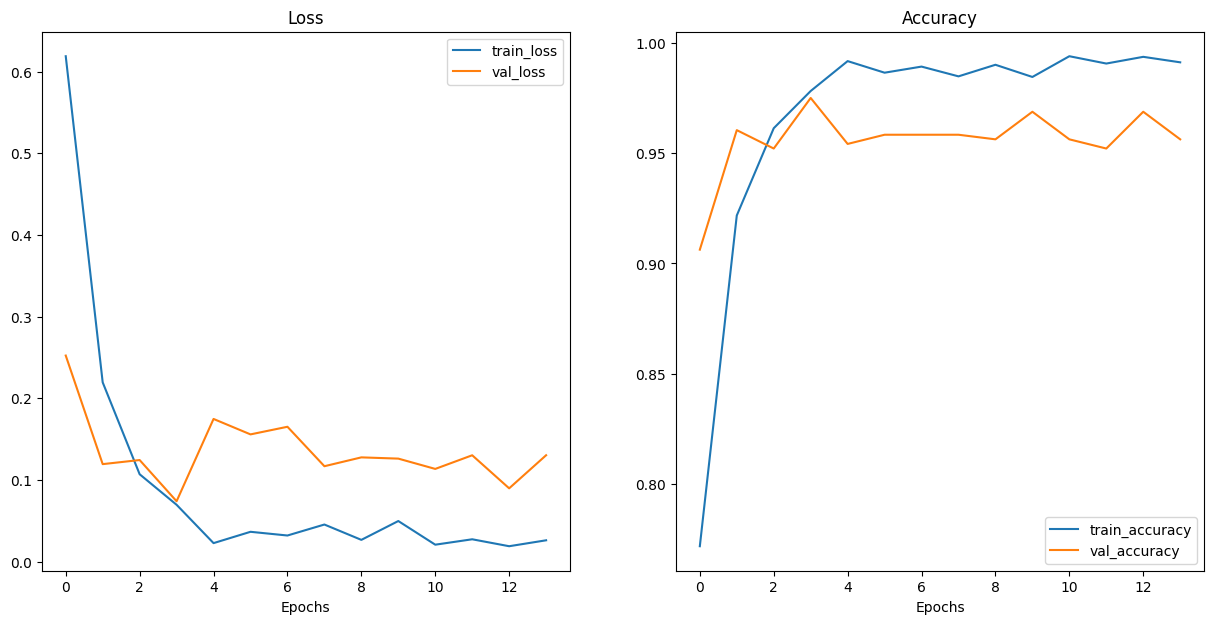

In [ ]:
plot_loss_curves(results)

# Test on Task-1,2,3 while trained on Task-3

Trained on Task-3

Testing on the first task:



<ipython-input-38-3fc3cd58ef82>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


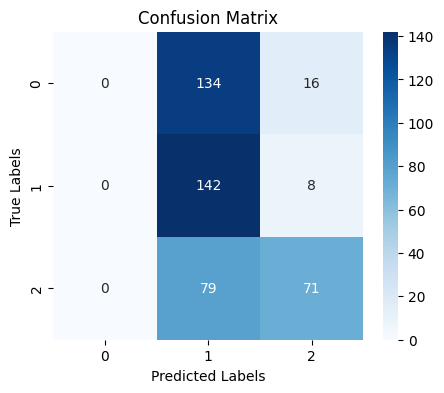

Test loss 4.7345127317976825
Test accuracy 0.475

Testing on the second task:



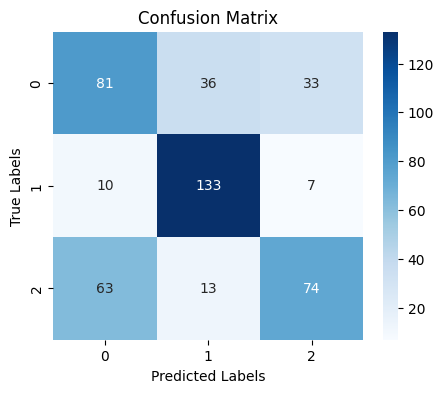

Test loss 1.5282826007848296
Test accuracy 0.6

Testing on the third task:



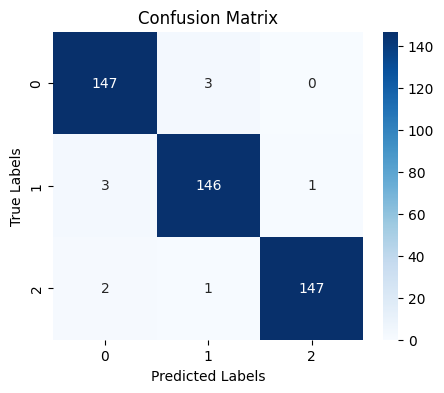

Test loss 0.07840942242764867
Test accuracy 0.9791666666666666


In [ ]:
# Load the saved best model
model.load_state_dict(torch.load(save_path))

# Put the model on the correct device
model.to(device)

print("Trained on Task-3")
print()

print("Testing on the first task:")
print()

t1_loss_on_task3, t1_acc_on_task3 = test(model=model,
    dataloader=task1_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the second task:")
print()

t2_loss_on_task3, t2_acc_on_task3 = test(model=model,
    dataloader=task2_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the third task:")
print()

t3_loss_on_task3, t3_acc_on_task3 = test(model=model,
    dataloader=task3_test_loader,
    loss_fn=loss_fn,
    device=device)

# Training on Task-4

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model/best_model_task4.pth'

In [ ]:
print("Training on Task-4")
print()
print()

# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(model=model,
                       train_dataloader=task4_train_loader,
                       test_dataloader=task4_val_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=100,
                       device=device,
                       early_stopping_patience=10,
                       save_path=save_path)

# End the timer and print out how long it took
end_time = timer()
print()
print()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Training on Task-4




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5162 | train_acc: 0.7851 | val_loss: 0.3782 | val_acc: 0.8479
Best model saved at epoch 1 with val loss 0.3782
Epoch: 2 | train_loss: 0.2169 | train_acc: 0.9204 | val_loss: 0.2329 | val_acc: 0.9167
Best model saved at epoch 2 with val loss 0.2329
Epoch: 3 | train_loss: 0.0877 | train_acc: 0.9657 | val_loss: 0.2295 | val_acc: 0.9333
Best model saved at epoch 3 with val loss 0.2295
Epoch: 4 | train_loss: 0.0826 | train_acc: 0.9737 | val_loss: 0.3910 | val_acc: 0.9042
Epoch: 5 | train_loss: 0.0614 | train_acc: 0.9806 | val_loss: 0.1818 | val_acc: 0.9500
Best model saved at epoch 5 with val loss 0.1818
Epoch: 6 | train_loss: 0.0606 | train_acc: 0.9817 | val_loss: 0.4327 | val_acc: 0.9021
Epoch: 7 | train_loss: 0.0560 | train_acc: 0.9817 | val_loss: 0.1684 | val_acc: 0.9437
Best model saved at epoch 7 with val loss 0.1684
Epoch: 8 | train_loss: 0.0252 | train_acc: 0.9912 | val_loss: 0.2243 | val_acc: 0.9646
Epoch: 9 | train_loss: 0.0269 | train_acc: 0.9900 | val_los

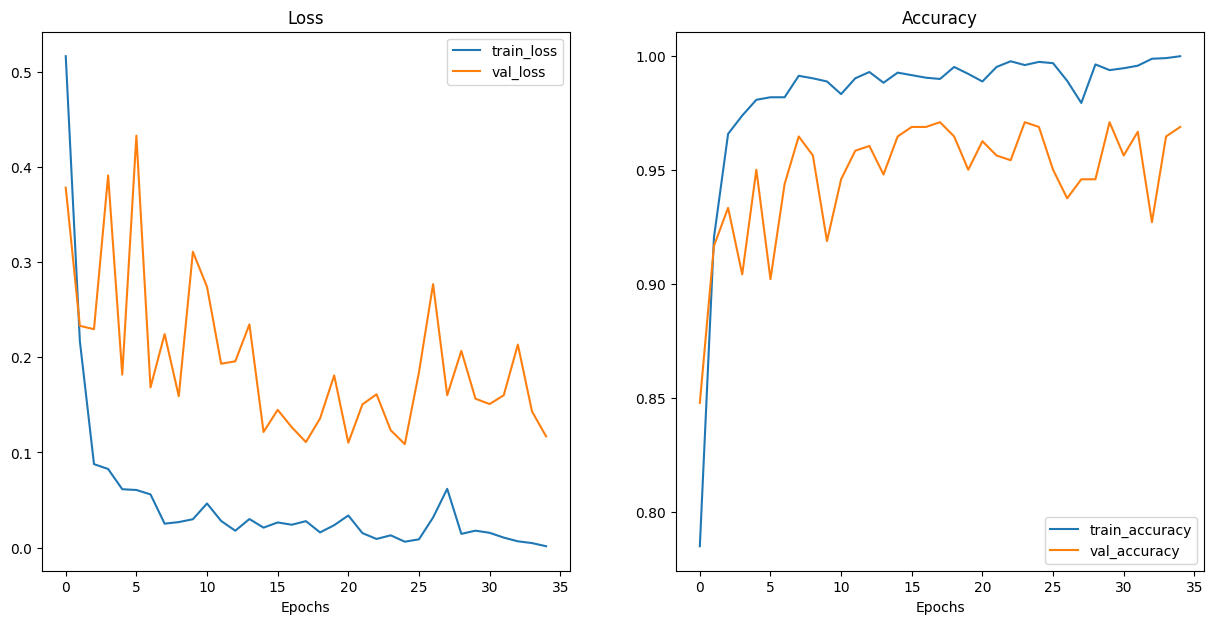

In [ ]:
plot_loss_curves(results)

# Test on Task-1,2,3 while trained on Task-4

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

Trained on Task-3

Testing on the first task:



<ipython-input-28-f66a3c17aed1>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


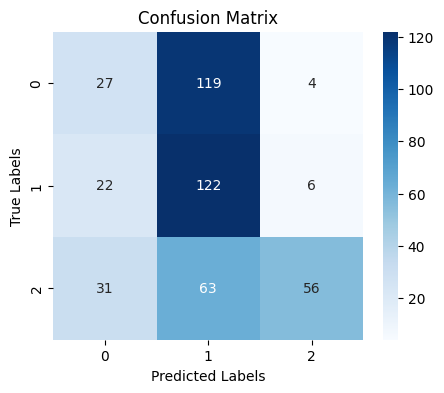

Test loss 4.581176577011744
Test accuracy 0.4270833333333333

Testing on the second task:



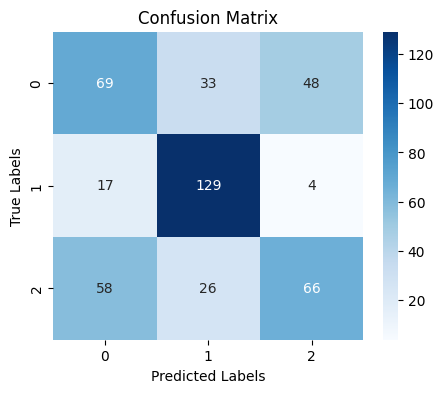

Test loss 2.3223669985930124
Test accuracy 0.55

Testing on the third task:



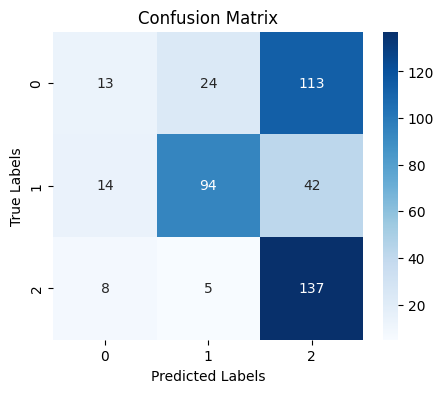

Test loss 2.926226183523734
Test accuracy 0.5708333333333333

Testing on the fourth task:



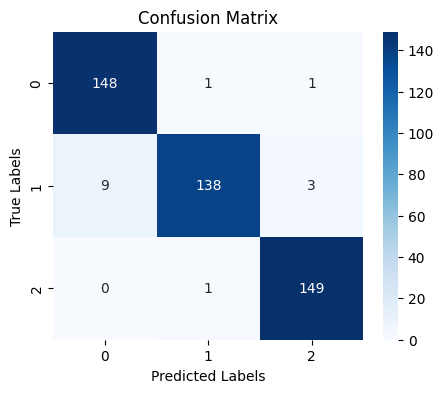

Test loss 0.11406055197197276
Test accuracy 0.96875

Average Accuracy: 0.6291666666666667%


In [ ]:
# Load the saved best model
model.load_state_dict(torch.load(save_path))

# Put the model on the correct device
model.to(device)

print("Trained on Task-3")
print()

print("Testing on the first task:")
print()

t1_loss_on_task4, t1_acc_on_task4 = test(model=model,
    dataloader=task1_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the second task:")
print()

t2_loss_on_task4, t2_acc_on_task4 = test(model=model,
    dataloader=task2_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the third task:")
print()

t3_loss_on_task4, t3_acc_on_task4 = test(model=model,
    dataloader=task3_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print("Testing on the fourth task:")
print()

t4_loss_on_task4, t4_acc_on_task4 = test(model=model,
    dataloader=task4_test_loader,
    loss_fn=loss_fn,
    device=device)

print()
print(f"Average Accuracy: {(t1_acc_on_task4 + t2_acc_on_task4 + t3_acc_on_task4 + t4_acc_on_task4)/4}%")

# Summary

In [ ]:
import pandas as pd
import numpy as np

# Create a dictionary with the data
data = {
    'task1': [t1_acc_on_task1, t1_acc_on_task2, t1_acc_on_task3, t1_acc_on_task4],
    'task2': [None, t2_acc_on_task2, t2_acc_on_task3, t2_acc_on_task4],
    'task3': [None, None, t3_acc_on_task3, t3_acc_on_task4],
    'task4': [None, None, None, t4_acc_on_task4]
}

# Create row names (index)
row_names = ['task1', 'task2', 'task3', 'task4']

# Create the DataFrame
df = pd.DataFrame(data, index=row_names)

# Display the DataFrame
print(df)


          task1     task2     task3    task4
task1  0.970833       NaN       NaN      NaN
task2  0.604167  0.941667       NaN      NaN
task3  0.475000  0.600000  0.979167      NaN
task4  0.427083  0.550000  0.570833  0.96875


# **Applying EWC (Elastic Weight Consolidation)**


In [ ]:
from torch.utils.data import DataLoader

In [ ]:
save_path = '/content/drive/MyDrive/Shakib/Multiclass_large_model_with_same_type_disease/best_model/best_model_ewc.pth'

In [ ]:
class EWC:
    def __init__(self, model: nn.Module, dataloader: DataLoader, device: torch.device):
        self.model = model
        self.dataloader = dataloader
        self.device = device
        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        for n, p in self.params.items():
            self._means[n] = p.clone().detach()

    def _diag_fisher(self):
        precision_matrices = {n: torch.zeros_like(p) for n, p in self.params.items()}
        self.model.eval()

        for data in self.dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            self.model.zero_grad()
            outputs = self.model(inputs)

            # Use CrossEntropyLoss for multiclass
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()

            for n, p in self.model.named_parameters():
                if p.requires_grad:
                    precision_matrices[n].data += p.grad.data ** 2 / len(self.dataloader)

        return precision_matrices

    def penalty(self, model: nn.Module):
        loss = 0
        for n, p in model.named_parameters():
            if p.requires_grad:
                _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
                loss += _loss.sum()
        return loss


In [ ]:
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device, ewc=None, ewc_lambda=0.0) -> Tuple[float, float]:

    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        if ewc:
            loss += ewc_lambda * ewc.penalty(model)

        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:

    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train_ewc(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          early_stopping_patience: int = 5,
          save_path: str = 'best_model_ewc.pth',
          ewc = None, ewc_lambda = 0.5 ):

    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Initialize variables for early stopping and model saving
    best_loss = float('inf')
    patience_counter = 0

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device,
                                          ewc = ewc, ewc_lambda = ewc_lambda)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"val_loss: {test_loss:.4f} | "
          f"val_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        # Check if test loss has improved
        if test_loss < best_loss:
            best_loss = test_loss
            patience_counter = 0  # reset patience counter

            # Save the best model
            torch.save(model.state_dict(), save_path)
            print(f"Best model saved at epoch {epoch+1} with val loss {test_loss:.4f}")

        else:
            patience_counter += 1

        # Early stopping condition
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

    # Return the filled results at the end of the epochs
    return results

## model

In [ ]:
# Example usage with the given tasks
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model1 = torchvision.models.efficientnet_b0(weights=weights).to(device)
model1

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model1.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, # feature vector coming in
              out_features=len(task1_class_names))).to(device) # how many classes do we have?

model1.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [ ]:
tasks = [task1_train_loader, task2_train_loader, task3_train_loader, task4_train_loader]
val_tasks = [task1_val_loader, task2_val_loader, task3_val_loader, task4_val_loader]
test_tasks = [task1_test_loader, task2_test_loader, task3_test_loader, task4_test_loader]

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model1.parameters(), lr=0.001)


Training on Task 1




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4244 | train_acc: 0.8368 | val_loss: 0.2366 | val_acc: 0.9167
Best model saved at epoch 1 with val loss 0.2366
Epoch: 2 | train_loss: 0.1985 | train_acc: 0.9358 | val_loss: 0.3886 | val_acc: 0.8771
Epoch: 3 | train_loss: 0.1446 | train_acc: 0.9530 | val_loss: 0.1020 | val_acc: 0.9688
Best model saved at epoch 3 with val loss 0.1020
Epoch: 4 | train_loss: 0.0887 | train_acc: 0.9732 | val_loss: 0.1735 | val_acc: 0.9354
Epoch: 5 | train_loss: 0.1049 | train_acc: 0.9627 | val_loss: 0.1070 | val_acc: 0.9667
Epoch: 6 | train_loss: 0.0478 | train_acc: 0.9862 | val_loss: 0.1030 | val_acc: 0.9750
Epoch: 7 | train_loss: 0.0674 | train_acc: 0.9790 | val_loss: 0.1678 | val_acc: 0.9396
Epoch: 8 | train_loss: 0.0662 | train_acc: 0.9793 | val_loss: 0.3217 | val_acc: 0.9271
Epoch: 9 | train_loss: 0.0654 | train_acc: 0.9801 | val_loss: 0.0763 | val_acc: 0.9750
Best model saved at epoch 9 with val loss 0.0763
Epoch: 10 | train_loss: 0.0429 | train_acc: 0.9881 | val_loss: 0.1309 

<ipython-input-44-f4fc6e7df40e>:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load(save_path))


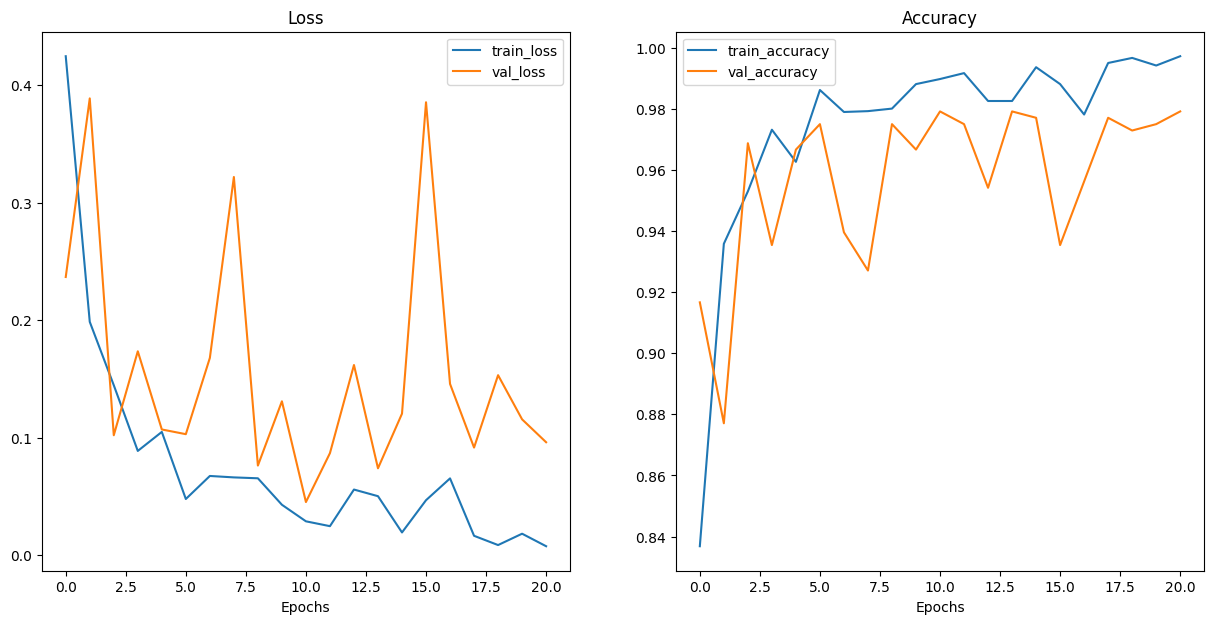

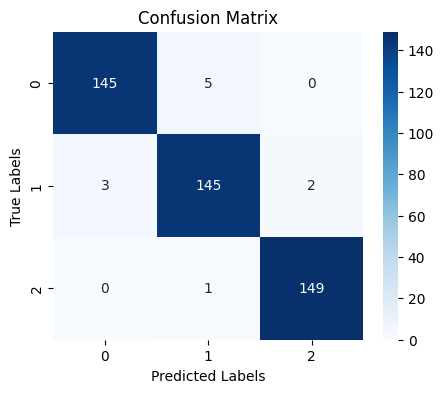

Test loss 0.055881819482904875
Test accuracy 0.9770833333333333
After training on Task 1, evaluation on Task 1: Test Loss: 0.0559, Accuracy: 97.71%


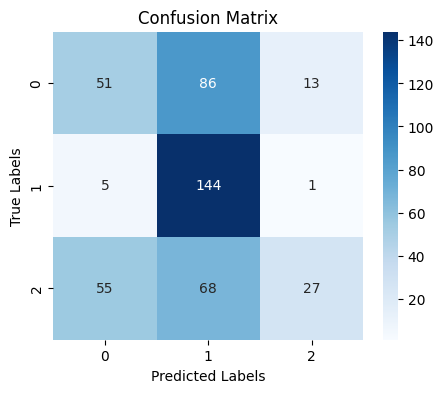

Test loss 2.6155167164591453
Test accuracy 0.4625
After training on Task 1, evaluation on Task 2: Test Loss: 2.6155, Accuracy: 46.25%


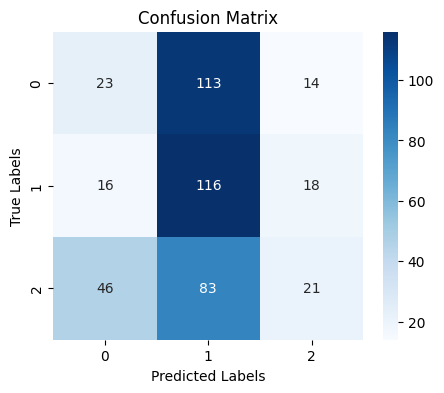

Test loss 3.555733581384023
Test accuracy 0.3333333333333333
After training on Task 1, evaluation on Task 3: Test Loss: 3.5557, Accuracy: 33.33%


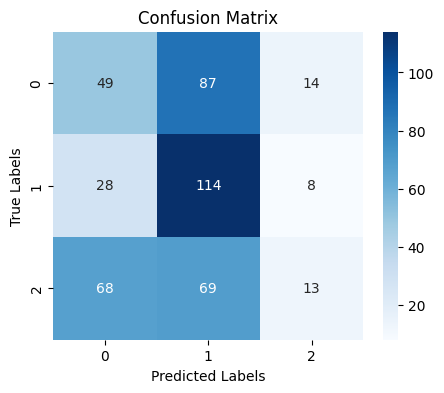

Test loss 4.272538385788599
Test accuracy 0.36666666666666664
After training on Task 1, evaluation on Task 4: Test Loss: 4.2725, Accuracy: 36.67%
-----------------------------------------------
Average Accuracy: 53.49
-----------------------------------------------
Training on Task 2




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6802 | train_acc: 0.7475 | val_loss: 0.4462 | val_acc: 0.8104
Best model saved at epoch 1 with val loss 0.4462
Epoch: 2 | train_loss: 0.4166 | train_acc: 0.8617 | val_loss: 0.3621 | val_acc: 0.8604
Best model saved at epoch 2 with val loss 0.3621
Epoch: 3 | train_loss: 0.2692 | train_acc: 0.9195 | val_loss: 0.2488 | val_acc: 0.9104
Best model saved at epoch 3 with val loss 0.2488
Epoch: 4 | train_loss: 0.1932 | train_acc: 0.9455 | val_loss: 0.1746 | val_acc: 0.9375
Best model saved at epoch 4 with val loss 0.1746
Epoch: 5 | train_loss: 0.1674 | train_acc: 0.9621 | val_loss: 1.1973 | val_acc: 0.7354
Epoch: 6 | train_loss: 0.1926 | train_acc: 0.9585 | val_loss: 0.1946 | val_acc: 0.9271
Epoch: 7 | train_loss: 0.1497 | train_acc: 0.9735 | val_loss: 0.1458 | val_acc: 0.9437
Best model saved at epoch 7 with val loss 0.1458
Epoch: 8 | train_loss: 0.0975 | train_acc: 0.9914 | val_loss: 0.1521 | val_acc: 0.9396
Epoch: 9 | train_loss: 0.0821 | train_acc: 0.9931 | val_los

<ipython-input-44-f4fc6e7df40e>:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load(save_path))


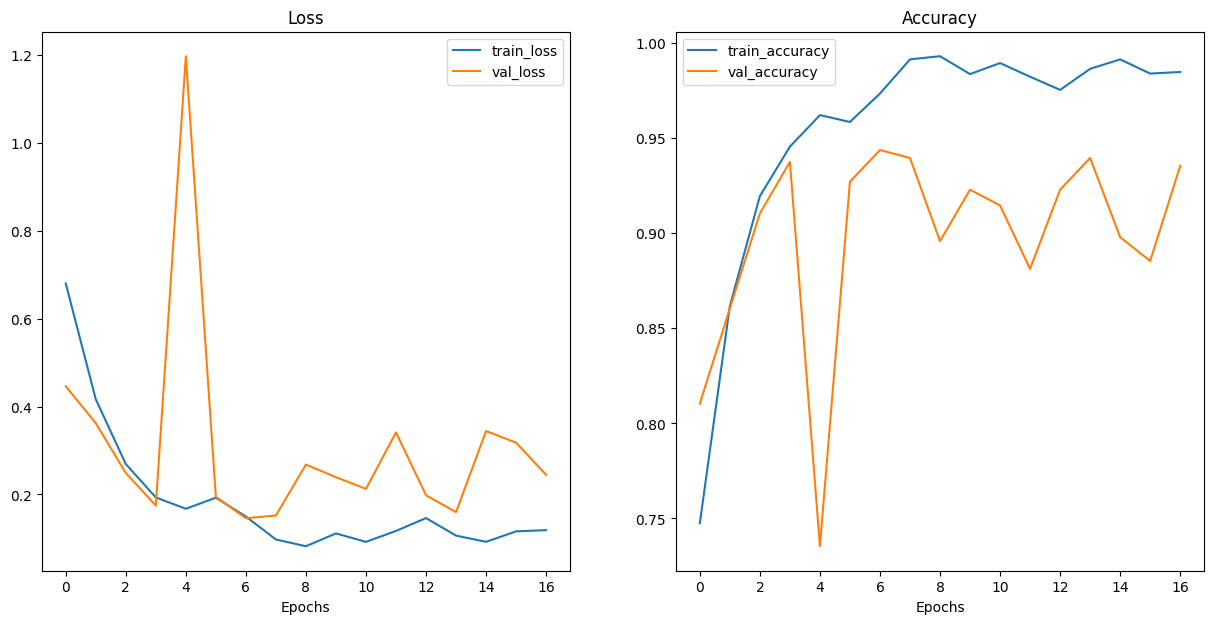

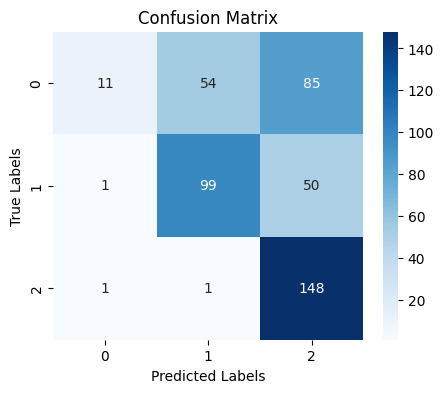

Test loss 2.1422501696118466
Test accuracy 0.6
After training on Task 2, evaluation on Task 1: Test Loss: 2.1423, Accuracy: 60.00%


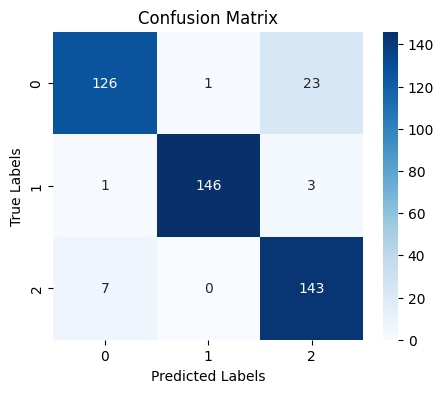

Test loss 0.2080686476935322
Test accuracy 0.9270833333333334
After training on Task 2, evaluation on Task 2: Test Loss: 0.2081, Accuracy: 92.71%


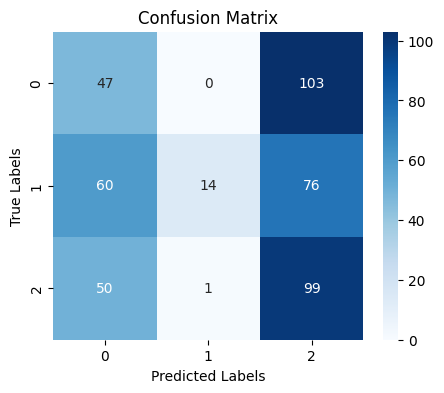

Test loss 2.3519777794679007
Test accuracy 0.3333333333333333
After training on Task 2, evaluation on Task 3: Test Loss: 2.3520, Accuracy: 33.33%


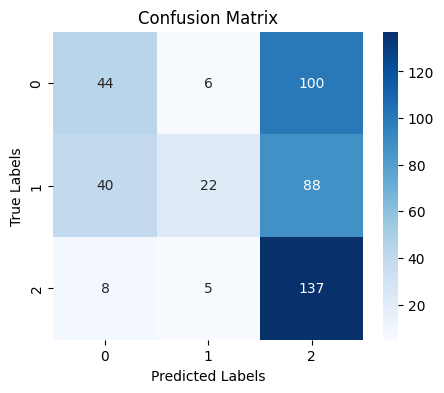

Test loss 2.118091255861024
Test accuracy 0.48541666666666666
After training on Task 2, evaluation on Task 4: Test Loss: 2.1181, Accuracy: 48.54%
-----------------------------------------------
Average Accuracy: 58.65
-----------------------------------------------
Training on Task 3




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5819 | train_acc: 0.7846 | val_loss: 0.3818 | val_acc: 0.8625
Best model saved at epoch 1 with val loss 0.3818
Epoch: 2 | train_loss: 0.2205 | train_acc: 0.9300 | val_loss: 0.1510 | val_acc: 0.9500
Best model saved at epoch 2 with val loss 0.1510
Epoch: 3 | train_loss: 0.1380 | train_acc: 0.9621 | val_loss: 0.1769 | val_acc: 0.9396
Epoch: 4 | train_loss: 0.0861 | train_acc: 0.9809 | val_loss: 0.1043 | val_acc: 0.9708
Best model saved at epoch 4 with val loss 0.1043
Epoch: 5 | train_loss: 0.0920 | train_acc: 0.9773 | val_loss: 0.0915 | val_acc: 0.9646
Best model saved at epoch 5 with val loss 0.0915
Epoch: 6 | train_loss: 0.0793 | train_acc: 0.9851 | val_loss: 0.1283 | val_acc: 0.9500
Epoch: 7 | train_loss: 0.0766 | train_acc: 0.9862 | val_loss: 0.1137 | val_acc: 0.9583
Epoch: 8 | train_loss: 0.0910 | train_acc: 0.9837 | val_loss: 0.1647 | val_acc: 0.9500
Epoch: 9 | train_loss: 0.1054 | train_acc: 0.9793 | val_loss: 0.0628 | val_acc: 0.9750
Best model saved at e

<ipython-input-44-f4fc6e7df40e>:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load(save_path))


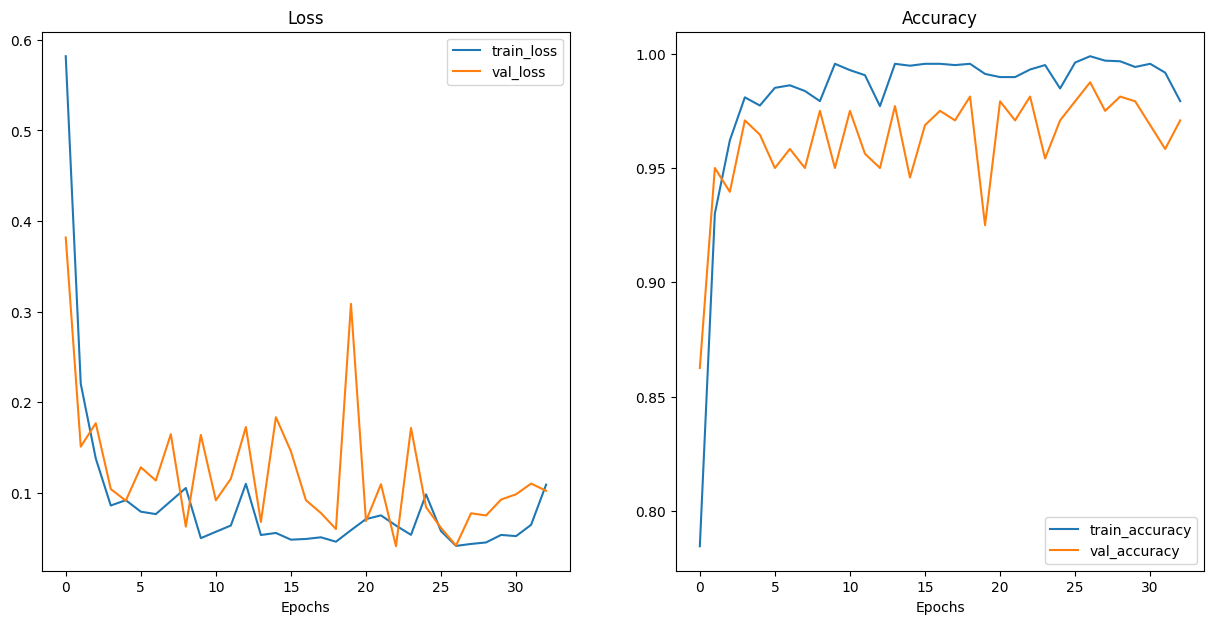

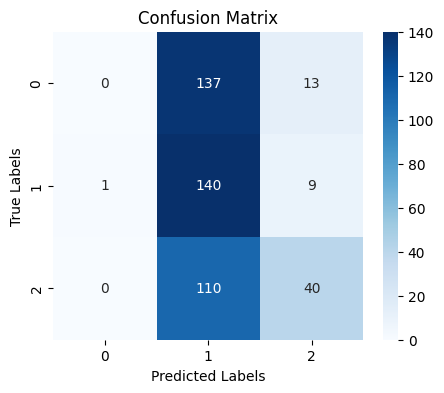

Test loss 8.266146917020281
Test accuracy 0.375
After training on Task 3, evaluation on Task 1: Test Loss: 8.2661, Accuracy: 37.50%


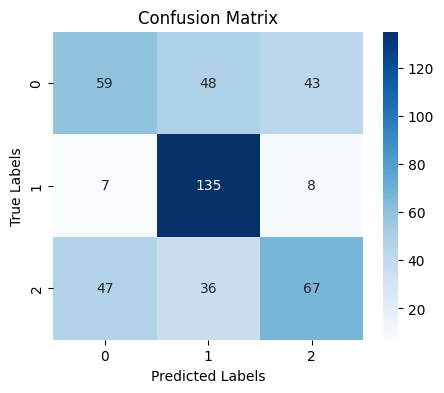

Test loss 3.328530381034701
Test accuracy 0.60625
After training on Task 3, evaluation on Task 2: Test Loss: 3.3285, Accuracy: 60.62%


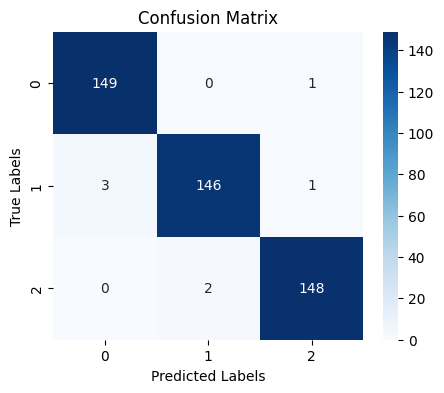

Test loss 0.045134294433880014
Test accuracy 0.9854166666666667
After training on Task 3, evaluation on Task 3: Test Loss: 0.0451, Accuracy: 98.54%


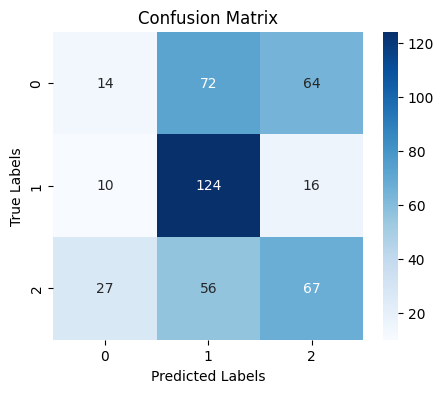

Test loss 4.0881341099739075
Test accuracy 0.4270833333333333
After training on Task 3, evaluation on Task 4: Test Loss: 4.0881, Accuracy: 42.71%
-----------------------------------------------
Average Accuracy: 59.84
-----------------------------------------------
Training on Task 4




  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9255 | train_acc: 0.6936 | val_loss: 0.4907 | val_acc: 0.7812
Best model saved at epoch 1 with val loss 0.4907
Epoch: 2 | train_loss: 0.3818 | train_acc: 0.8977 | val_loss: 0.2363 | val_acc: 0.8938
Best model saved at epoch 2 with val loss 0.2363
Epoch: 3 | train_loss: 0.2450 | train_acc: 0.9516 | val_loss: 0.1866 | val_acc: 0.9375
Best model saved at epoch 3 with val loss 0.1866
Epoch: 4 | train_loss: 0.2010 | train_acc: 0.9629 | val_loss: 0.2320 | val_acc: 0.9313
Epoch: 5 | train_loss: 0.1533 | train_acc: 0.9779 | val_loss: 0.1322 | val_acc: 0.9458
Best model saved at epoch 5 with val loss 0.1322
Epoch: 6 | train_loss: 0.1453 | train_acc: 0.9809 | val_loss: 0.1632 | val_acc: 0.9375
Epoch: 7 | train_loss: 0.1216 | train_acc: 0.9864 | val_loss: 0.1556 | val_acc: 0.9479
Epoch: 8 | train_loss: 0.1384 | train_acc: 0.9831 | val_loss: 0.2681 | val_acc: 0.9208
Epoch: 9 | train_loss: 0.1342 | train_acc: 0.9829 | val_loss: 0.1794 | val_acc: 0.9313
Epoch: 10 | train_los

<ipython-input-44-f4fc6e7df40e>:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load(save_path))


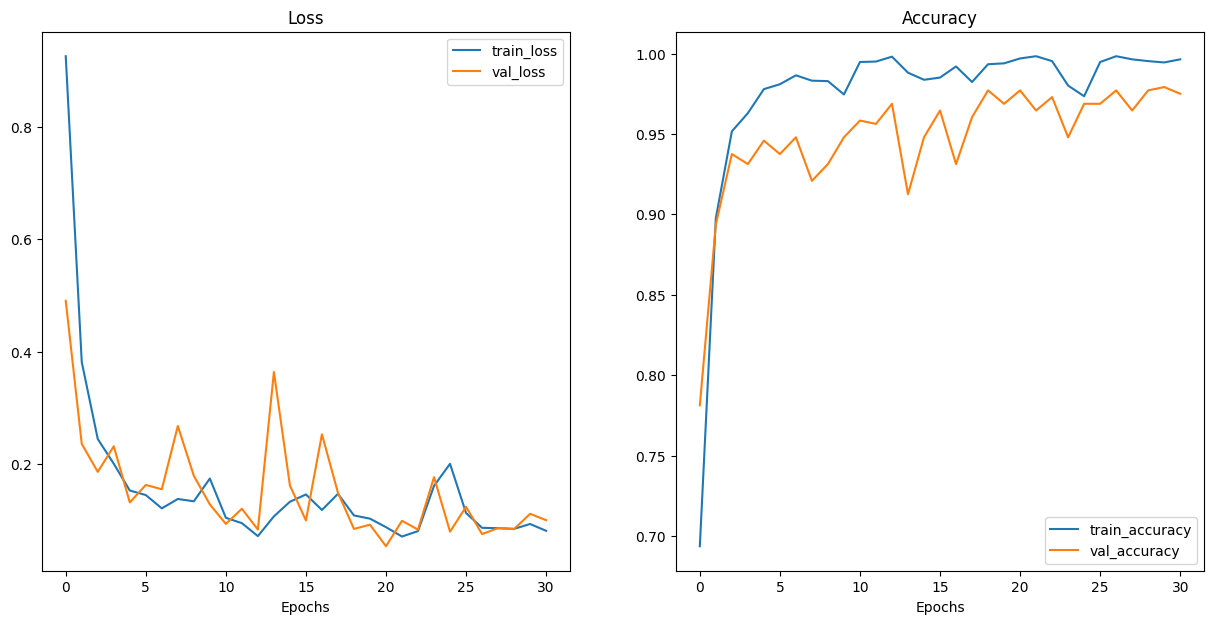

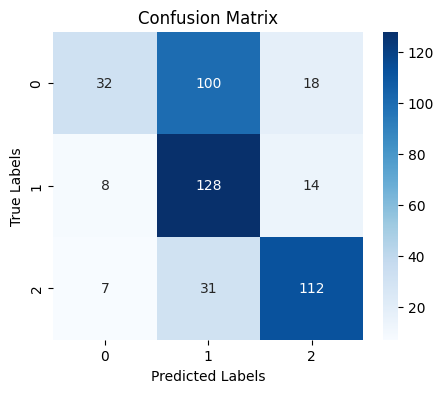

Test loss 2.972187291830778
Test accuracy 0.5979166666666667
After training on Task 4, evaluation on Task 1: Test Loss: 2.9722, Accuracy: 59.79%


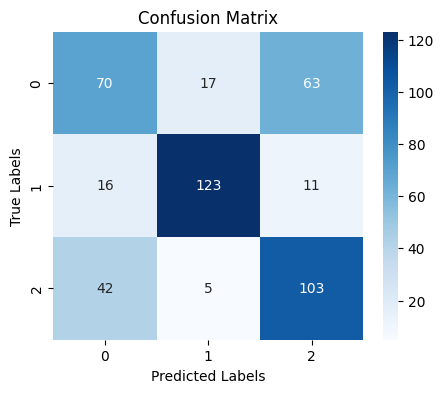

Test loss 1.4460245177149773
Test accuracy 0.6479166666666667
After training on Task 4, evaluation on Task 2: Test Loss: 1.4460, Accuracy: 64.79%


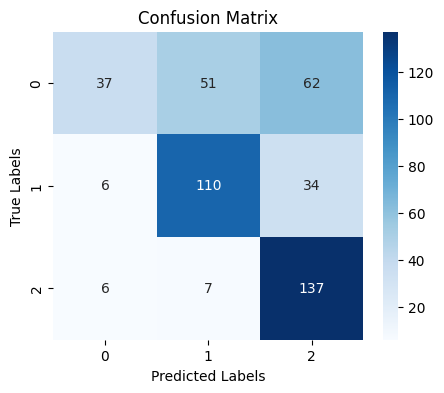

Test loss 1.9343267674247415
Test accuracy 0.6541666666666667
After training on Task 4, evaluation on Task 3: Test Loss: 1.9343, Accuracy: 65.42%


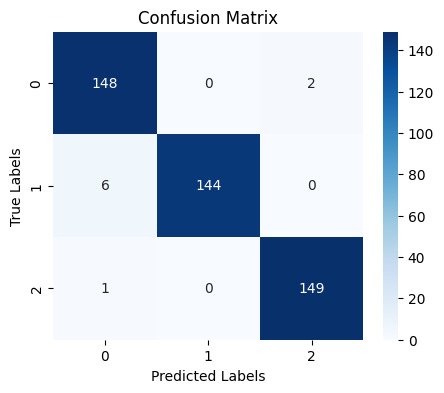

Test loss 0.04644158653294047
Test accuracy 0.98125
After training on Task 4, evaluation on Task 4: Test Loss: 0.0464, Accuracy: 98.12%
-----------------------------------------------
Average Accuracy: 72.03
-----------------------------------------------


In [ ]:
ewc_lambda = 0.4  # The importance of the old tasks
ewc = None
test_acc = []

for task_id, (train_loader, val_loader) in enumerate(zip(tasks, val_tasks)):
    if task_id > 0:
        ewc = EWC(model1, train_loader, device)

    # for epoch in range(20):  # Train for 10 epochs for each task
    print(f"Training on Task {task_id + 1}")
    print("=========================================================")
    print()
    print()
    if task_id > 0:
      results_train = train_ewc(model=model1,
                    train_dataloader=train_loader,
                    test_dataloader=val_loader,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=100,
                    device=device,
                    early_stopping_patience=10,
                    save_path=save_path,
                    ewc = ewc, ewc_lambda = ewc_lambda)

    else:
      results_train = train_ewc(model=model1,
                    train_dataloader=train_loader,
                    test_dataloader=val_loader,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=100,
                    device=device,
                    early_stopping_patience=10,
                    save_path=save_path,
                    ewc = ewc, ewc_lambda = ewc_lambda)

    plot_loss_curves(results_train)
    # Evaluate on all tasks
    # Load the saved best model
    model1.load_state_dict(torch.load(save_path))

    # Put the model on the correct device
    model1.to(device)
    x = 0
    for eval_task_id, eval_test_loader in enumerate(test_tasks):
        eval_test_loss, eval_accuracy = test(model=model1,
            dataloader=eval_test_loader,
            loss_fn=loss_fn,
            device=device)
        test_acc.append(eval_accuracy)
        x+=eval_accuracy
        print(f"After training on Task {task_id + 1}, evaluation on Task {eval_task_id + 1}: Test Loss: {eval_test_loss:.4f}, Accuracy: {(eval_accuracy*100):.2f}%")
    print("-----------------------------------------------")
    print(f"Average Accuracy: {((x*100)/4):.2f}")
    print("-----------------------------------------------")
    if task_id == 0:
        ewc = EWC(model1, train_loader, device)
    else:
        new_ewc = EWC(model1, train_loader, device)
        for n, p in ewc._precision_matrices.items():
            new_ewc._precision_matrices[n] += p
        ewc = new_ewc